## Experiments for segmentation model used to identify poultry houses

### Terms/Vars

tile_1 = m_3807537_ne

Quadrangles / Regions / Set of tiles: 

poultry_region_1 = m_38075

poultry_region_2 = m_38076

poultry_region_3 = m_39075

non_poultry_region_1 = m_38077

non_poultry_region_2 = m_39077

### Setups

Model 1: Take 4000 random samples from tile_1, train on 2000 samples, test on 1000 samples and validate on 1000 samples.

Model 2: Train on 50000 random samples from poultry_region_1, test on poultry_region_2 and validate on poultry_region_3

##### Model_1 experiments

1.1. Using model_1, Test on entire tile_1 
    - Motivation: See how model performs, a starter

1.2. Using model_1, test on other random tiles. ("Other" tiles have poultry houses)
    - Motivation: See how model generalizes to tiles with poultry houses

1.3. Using model_1, Test on another tile without poultry house
    - Motivation: See how model generalizes to tiles without poultry houses

##### Model_2 experiments

- Motivation: See how model generalizes to tiles with/o poultry houses, and also to test experiment on larger scale

2.1. Train on 50000 random samples from poultry_region_1, test on poultry_region_2 and validate on poultry_region_3

2.2. Train on 50000 random samples from poultry_region_1,2,3, test on non_poultry_region_1,2.


### Neccessary functions
#### Get metrics

In [18]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np
import fiona
import matplotlib
import glob
import pandas as pd

def get_metrics(pred_path):
    src = rasterio.open(pred_path)
    raw = np.array(src.read())
    y_pred = (raw == 1) # chicken
    y_pred = y_pred.astype(int)
    y_pred = y_pred.squeeze()
    
    src_masked = rasterio.open("./m_3807537_ne_18_1_20170611_rasterized2.tif")
    y_true = np.array(src_masked.read())
    y_true = y_true.squeeze()
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    assert tp + tn + fp + fn == y_true.size

    n = tp + fp + tn + fn

    acc = (tp+tn)/n
    recall = (tp/(tp+fn))
    precision = tp / (tp + fp)
    iou = tp /(tp + fn + fp)

#     print("IOU: {}".format(iou))
#     print("Accuracy: {}".format(acc))
#     print("Precision: {}".format(precision))
#     print("Recall: {}".format(recall))
    return iou, acc, precision, recall

In [29]:
one_for_all = [
    "#FFFFFF",
    "#FF0000"
]
one_for_all_cmap = matplotlib.colors.ListedColormap(one_for_all)
plt.rcParams["figure.figsize"] = (20,10)
def plot_tile(path):
    src = rasterio.open(path)
    plt.imshow(src.read(1),vmin=0, vmax=2, cmap=one_for_all_cmap)
    plt.show()

### Model 1

#### Data description

Here, samples = 150x150 patches

Ratio of chicken house to non-chicken house: 0.27
Number of chicken house patches: 1080
Train on 2009 samples, validate on 991 samples

Epoch 1: loss: 0.0624 - iou_coef: 0.9398 - val_loss: 0.0322 - val_iou_coef: 0.9667
Epoch 2: loss: 0.0330 - iou_coef: 0.9656 - val_loss: 0.0317 - val_iou_coef: 0.9662
Epoch 3: loss: 0.0297 - iou_coef: 0.9687 - val_loss: 0.0325 - val_iou_coef: 0.9651
Epoch 4: loss: 0.0265 - iou_coef: 0.9717 - val_loss: 0.0257 - val_iou_coef: 0.9716

Early stopped

Test results on 1000 samples

loss: 0.027708684034645558, iou_coef: 0.9688617587089539

In [24]:
metrics = {}
all_metrics = []

In [25]:
exps = glob.glob('../landcover_scripts/test_run/single_tile_4000s_inf/*')
for e in exps:
    temp = {}
    temp['model'] = e.split("/")[-1]
    temp_metrics = [*get_metrics(e)]
    temp['iou'] = temp_metrics[0]
    temp['acc'] = temp_metrics[1]
    temp['precision'] = temp_metrics[2]
    temp['recall'] = temp_metrics[3]
    all_metrics.append(temp)

In [26]:
pd.DataFrame(all_metrics)

,model,iou,acc,precision,recall
0,ae_tuned_model_02_single_inference.tif,0.704366,0.997044,0.733813,0.946100
1,ae_tuned_model_04_single_inference.tif,0.781518,0.998095,0.842289,0.915482
2,ae_tuned_model_03_single_inference.tif,0.747645,0.997860,0.859290,0.851947
3,ae_tuned_model_01_single_inference.tif,0.733203,0.997613,0.813599,0.881235


#### Visualization

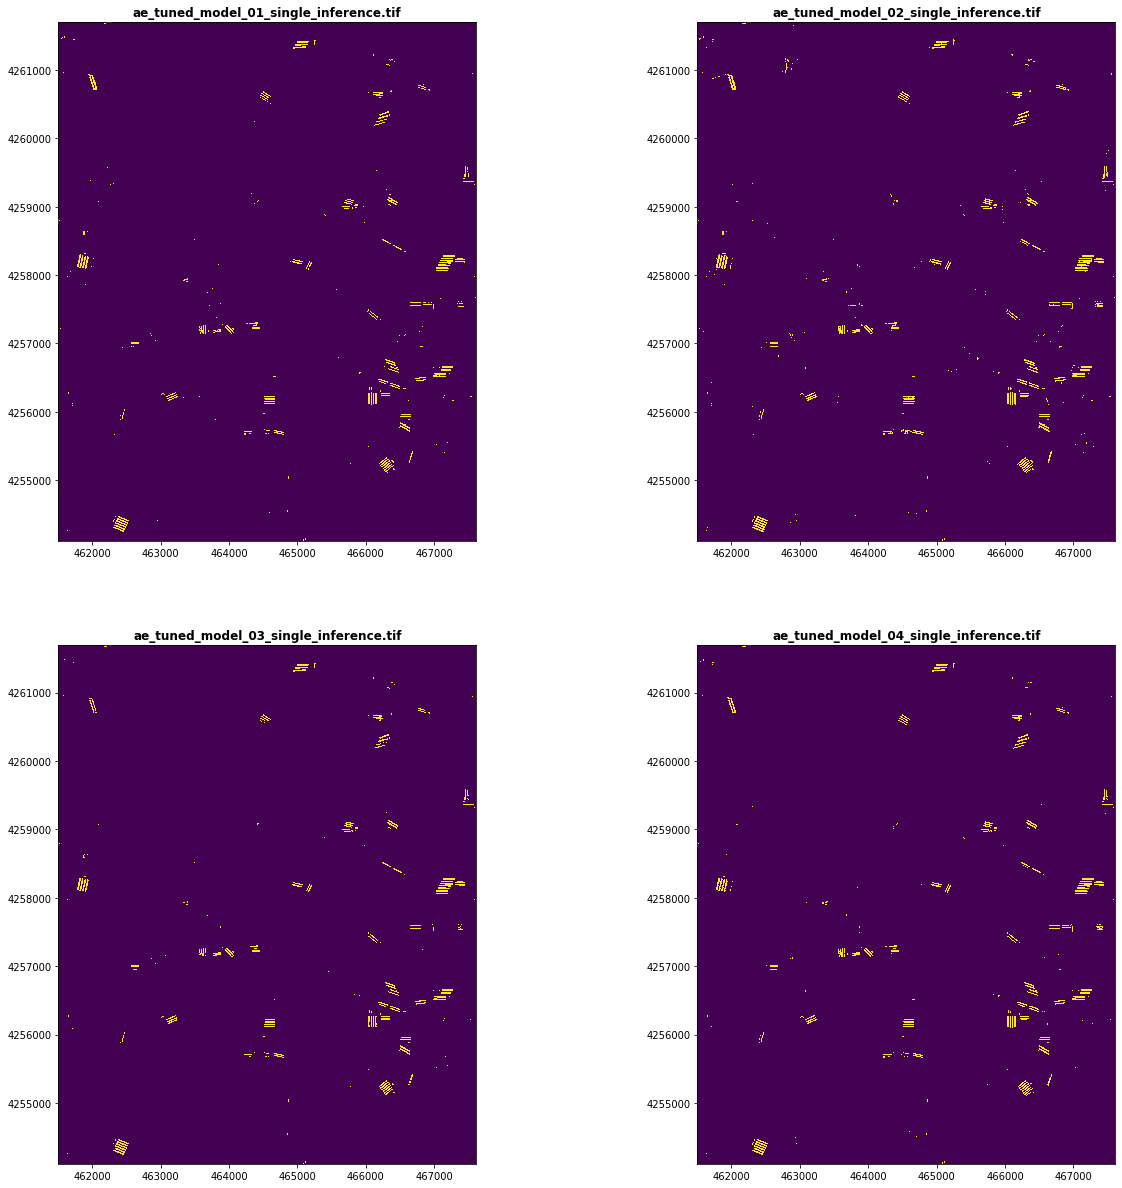

In [65]:
src1 = rasterio.open(exps[0])
src2 = rasterio.open(exps[1])
src3 = rasterio.open(exps[2])
src4 = rasterio.open(exps[3])
fig, ([ax1, ax2], [ax3, ax4]) = plt.subplots(2,2, figsize=(21,21))
show((src1, 1), ax=ax2, title=exps[0].split("/")[-1])
show((src2, 1), ax=ax4, title=exps[1].split("/")[-1])
show((src3, 1), ax=ax3, title=exps[2].split("/")[-1])
show((src4, 1), ax=ax1, title=exps[3].split("/")[-1])